Caminho encontrado: ['A', 'B', 'E', 'F']


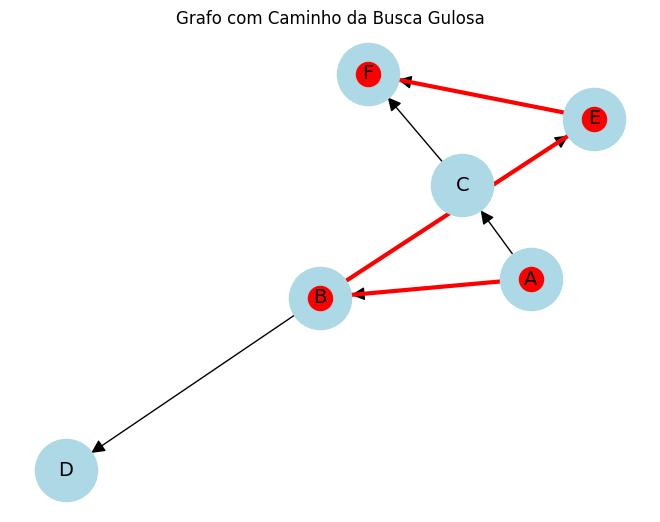

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Função de busca gulosa
def busca_gulosa(grafo, inicio, objetivo, heuristica):
    visitados = set()
    fila = PriorityQueue()
    fila.put((heuristica[inicio], [inicio]))

    while not fila.empty():
        _, caminho = fila.get()
        no_atual = caminho[-1]

        if no_atual in visitados:
            continue

        visitados.add(no_atual)

        if no_atual == objetivo:
            return caminho

        for vizinho in grafo[no_atual]:
            if vizinho not in visitados:
                novo_caminho = list(caminho)
                novo_caminho.append(vizinho)
                fila.put((heuristica[vizinho], novo_caminho))

    return None

# Função para desenhar o grafo
def desenhar_grafo(grafo, caminho=None):
    G = nx.DiGraph()

    for no, vizinhos in grafo.items():
        for vizinho in vizinhos:
            G.add_edge(no, vizinho)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, arrowsize=20)

    if caminho:
        # Criar arestas do caminho
        edge_list = list(zip(caminho, caminho[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='red', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='red')

    plt.title("Grafo com Caminho da Busca Gulosa" if caminho else "Grafo")
    plt.show()


# Grafo e heurística
grafo = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

heuristica = {
    'A': 6,
    'B': 4,
    'C': 5,
    'D': 2,
    'E': 1,
    'F': 0
}

# Execução
inicio = 'A'
objetivo = 'F'
caminho = busca_gulosa(grafo, inicio, objetivo, heuristica)

if caminho:
    print("Caminho encontrado:", caminho)
else:
    print("Caminho não encontrado.")

# Desenha o grafo com o caminho (se houver)
desenhar_grafo(grafo, caminho)
